In [ ]:
!git clone https://github.com/nlp-with-transformers/notebooks.git
%cd notebooks
from install import *
install_requirements()

fatal: destination path 'notebooks' already exists and is not an empty directory.
/content/notebooks
⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing Git LFS ...
✅ Git LFS installed!


In [ ]:
#%%capture
!pip install transformers==4.41.2
!pip install datasets==2.20.0

!pip install pyarrow==16.0
!pip install requests==2.32.3

!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0

!pip install importlib-metadata

!pip install accelerate -U

  Using cached transformers-4.41.2-py3-none-any.whl (9.1 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.16.2
    Uninstalling transformers-4.16.2:
      Successfully uninstalled transformers-4.16.2
  Using cached datasets-2.20.0-py3-none-any.whl (547 kB)
  Attempting uninstall: datasets
    Found existing installation: datasets 1.16.1
    Uninstalling datasets-1.16.1:
      Successfully uninstalled datasets-1.16.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.5.1
    Uninstalling accelerate-0.5.1:
      Successfully uninstalled accelerate-0.5.1


In [ ]:
#%%capture
# Verifying packages installed are now up to date
!pip show pyarrow requests transformers datasets torch torchaudio importlib-metadata

Name: pyarrow
Version: 16.0.0
Summary: Python library for Apache Arrow
Home-page: https://arrow.apache.org/
Author: 
Author-email: 
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: bigframes, cudf-cu12, datasets, db-dtypes, ibis-framework, pandas-gbq, tensorflow-datasets
---
Name: requests
Version: 2.32.3
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: certifi, charset-normalizer, idna, urllib3
Required-by: bertviz, bigframes, CacheControl, community, datasets, earthengine-api, fastai, folium, gcsfs, gdown, geocoder, google-api-core, google-cloud-bigquery, google-cloud-storage, google-colab, huggingface-hub, kaggle, kagglehub, moviepy, music21, pandas-datareader, panel, pooch, pymystem3, requests-oauthlib, spacy, Sphinx, tensorboard, tensorflow-datasets, tf2o

In [ ]:
!nvidia-smi

Fri Jun 28 16:12:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   52C    P8              17W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
import transformers
import datasets
import tokenizers

print("PyTorch Version:" + torch.__version__)
print("Transformers Version:" + transformers.__version__)
print("Datasets Version:" + datasets.__version__)
print("Tokenizers Version:" + tokenizers.__version__)

PyTorch Version:2.3.0+cu121
Transformers Version:4.41.2
Datasets Version:2.20.0
Tokenizers Version:0.19.1


In [ ]:
from utils import *
setup_chapter()

Using transformers v4.41.2
Using datasets v2.20.0


In [ ]:
import pandas as pd
toks = "Jeff Dean is a computer scientist at Google in California".split()
lbls = ["B-PER", "I-PER", "O", "O", "O", "O", "O", "B-ORG", "O", "B-LOC"]
df = pd.DataFrame(data=[toks, lbls], index=['Tokens', 'Tags'])
df

,0,1,2,3,4,5,6,7,8,9
Tokens,Jeff,Dean,is,a,computer,scientist,at,Google,in,California
Tags,B-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC


In [ ]:
from datasets import get_dataset_config_names

xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME has {len(xtreme_subsets)} configurations")

XTREME has 183 configurations


In [ ]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets[:3]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

In [ ]:
from datasets import load_dataset

load_dataset("xtreme", name="PAN-X.de")

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

### First Code Block
```python
toks = "Jeff Dean is a computer scientist at Google in California".split()
lbls = ["B-PER", "I-PER", "O", "O", "O", "O", "O", "B-ORG", "O", "B-LOC"]
df = pd.DataFrame(data={"toks": toks, "lbls": lbls}, index=["Tokens", "Tags"])
```
- `toks = ...split()`: This line splits a string into a list of words. `split()` by default splits by whitespace.
- `lbls = [...]`: This line defines a list of labels corresponding to each token in the `toks` list, indicating whether each token is part of a named entity (e.g., person, organization, location) and its position in the entity (beginning or inside).
- `df = pd.DataFrame(...)`: This creates a pandas DataFrame with two columns: "toks" and "lbls". The `index` parameter here is used incorrectly and would actually throw an error; it seems intended to set column names, which should be handled differently, typically not using `index`.

### Second Code Block
```python
from datasets import get_dataset_config_names
xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME has {len(xtreme_subsets)} configurations")
```
- `get_dataset_config_names("xtreme")`: This fetches all available dataset configurations for a dataset named "xtreme" from the `datasets` library. The function returns a list of configuration names.
- `print(...)`: Displays the number of configurations found for the "xtreme" dataset.

### Third Code Block
```python
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets[:3]
```
- `panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]`: This line creates a list comprehension filtering `xtreme_subsets` to include only those that start with "PAN", which is likely a specific subset or category within the XTREME datasets.
- `panx_subsets[:3]`: This slices the list to show only the first three entries. It's common to slice lists to examine a subset of the data without printing everything.

### Fourth Code Block
```python
from datasets import load_dataset
load_dataset("xtreme", name="PAN-X.de")
```
- `load_dataset("xtreme", name="PAN-X.de")`: This function loads a specific dataset. It specifies "xtreme" as the dataset and "PAN-X.de" as the configuration name, which likely points to a dataset configured for German (denoted by ".de").



The "PAN-X" subsets within the "XTREME" dataset are part of a collection of benchmark datasets designed for evaluating the performance of models on cross-lingual natural language processing (NLP) tasks, including Named Entity Recognition (NER). The "XTREME" benchmark, which stands for Cross-lingual TRansfer Evaluation of Multilingual Encoders, includes multiple types of NLP tasks, and "PAN-X" specifically targets the NER challenge.

### Details of PAN-X

- **Purpose**: The PAN-X subset is used to assess how well NLP models can recognize named entities (like names of people, locations, organizations) in text across different languages.
- **Content**: It typically contains data in multiple languages, each labeled with annotations that mark named entities according to a standard schema (such as B-PER for beginning of a person's name, I-PER for continuation of a person's name, etc.).
- **Utility**: This subset is crucial for developing and testing the effectiveness of multilingual models in identifying and categorizing entities correctly across different linguistic contexts.

### Why It's Important

For NER systems, performance can vary significantly between languages due to linguistic differences and the availability of training data. By using datasets like PAN-X, researchers and developers can train models that are not only effective in languages with rich resources (like English) but also in less resource-dense languages, thus ensuring broader applicability and utility of NLP technologies globally.

The "PAN-X" subsets in "XTREME" allow researchers to benchmark their models on a consistent set of data across many languages, making it an essential tool for advancing the state of multilingual NLP.

### Training Models with PAN-X

1. **Multilingual NER**: PAN-X provides annotated text data in various languages. Each piece of text is labeled with tags that identify different types of named entities such as persons (PER), locations (LOC), organizations (ORG), etc. This annotation format is crucial for training NER models, as it teaches the model to recognize where entities start and end in text and what type of entity they are.

2. **Cross-lingual Generalization**: One of the main goals of using a dataset like PAN-X is to train models that not only perform well in high-resource languages but also generalize across languages that may have less training data available. This is particularly important in building NER systems that are globally applicable.

3. **Model Evaluation**: Besides training, PAN-X is also used for validating and testing the performance of NER models. This helps in understanding the effectiveness of different model architectures and training approaches in handling the linguistic nuances of different languages.

4. **Benchmarking**: PAN-X serves as a benchmark dataset for comparing different models and approaches in multilingual NER. By using a consistent dataset across various studies, it provides a standardized way to measure progress in the field.

### Use in Research and Development

Researchers and developers use PAN-X to:
- **Train models**: By feeding the labeled data from PAN-X into machine learning algorithms, models learn to identify and classify named entities in text.
- **Fine-tune models**: For models pre-trained on large datasets (like BERT or other transformer-based models), PAN-X can be used to fine-tune these models on the specific task of NER across multiple languages.
- **Test cross-lingual capabilities**: After training, models are tested on language subsets they were not explicitly trained on to evaluate their ability to transfer learning across languages.

In [ ]:
from collections import defaultdict
from datasets import DatasetDict

langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]
# Return a DatasetDict if a key doesn't exist
panx_ch = defaultdict(DatasetDict) # this initialises panx_ch as a defaultdict which autom

for lang, frac in zip(langs, fracs):
    # Load monolingual corpus
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
    # Shuffle and downsample each split according to spoken proportion
    for split in ds:
        panx_ch[lang][split] = (
            ds[split].shuffle(seed=0).select(range(int(frac * ds[split].num_rows))))

Certainly! Let's break down the code you provided, focusing on the use of `defaultdict`, `DatasetDict`, `zip`, and dataset manipulation methods:

### Understanding the Code

**Code Setup:**
```python
from collections import defaultdict
from datasets import DatasetDict

langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]
# Return a DatasetDict if a key doesn't exist
panx_ch = defaultdict(DatasetDict)
```
- `defaultdict(DatasetDict)`: This initializes `panx_ch` as a `defaultdict` that automatically creates a new `DatasetDict` if an accessed key doesn't exist. A `DatasetDict` is a special dictionary structure provided by the `datasets` library, typically used to store train, validation, and test datasets under respective keys.

**Loop Explanation:**
```python
for lang, frac in zip(langs, fracs):
    # Load monolingual corpus
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
    # Shuffle and downsample each split according to spoken proportion
    for split in ds:
        panx_ch[lang][split] = (
            ds[split]
            .shuffle(seed=0)
            .select(range(int(frac * ds[split].num_rows))))
```
- `for lang, frac in zip(langs, fracs)`: This loop iterates over languages and their corresponding fractions simultaneously. `zip()` is used to pair each language with its fraction, which represents the proportion of that language spoken in a specific context (here possibly weighted by linguistic presence in a country like Switzerland).

- `ds = load_dataset("xtreme", name=f"PAN-X.{lang})`: This line loads the dataset for a specific language. The `name` parameter is dynamically formatted to match the dataset name structure, loading different language data as specified by the loop iteration.

- `for split in ds:`: This nested loop iterates over each data split in the dataset `ds`, typically 'train', 'validation', and 'test'.

- `panx_ch[lang][split] = ...`: Here, data for each language and split is stored in `panx_ch`. If the language key does not exist, `defaultdict` automatically creates a new `DatasetDict` for it.

- `ds[split].shuffle(seed=0)`: This method shuffles the dataset split to ensure that data sampling is random, controlled by a seed for reproducibility.

- `.select(range(int(frac * ds[split].num_rows)))`: After shuffling, this method selects a subset of the data according to the specified fraction `frac`. This is done by creating a range that spans from 0 to the product of the fraction and the number of rows in the dataset split, effectively downsampling the data according to the given proportion.

### Purpose of the Code

The primary purpose of this code is to load multilingual datasets, shuffle them for randomness, and then downsample each according to the linguistic proportion specified by `fracs`. This can be useful in scenarios where you need to balance or weight datasets according to linguistic demographics or usage frequencies, ensuring that models trained on this data are better tailored to the actual linguistic landscape they will operate within.

A `defaultdict` is a subclass of the built-in `dict` class in Python, provided by the `collections` module. It's used to provide a default value for the dictionary entries that haven't been set yet. When you access or modify a key that does not exist in the dictionary, `defaultdict` automatically creates a new entry for it with a default value determined by a function you provide when you initialize the `defaultdict`.

### How `defaultdict` Works
When you declare a `defaultdict`, you must provide a function that Python can call to produce a default value whenever a key is accessed that does not exist in the dictionary. This function should not take any arguments and return the default value you want for your new keys.

### Example of `defaultdict` Usage
Suppose you have a `defaultdict(int)`. Here, `int` is a function that, when called without any arguments, returns `0`. So, any time you try to access or modify a key that doesn't exist, `defaultdict` will automatically create that key with a value of `0`.

### `defaultdict(DatasetDict)`
In your specific example, `defaultdict(DatasetDict)` initializes a `defaultdict` where the default value for any new key is a `DatasetDict` object. `DatasetDict` is a class provided by the `datasets` library (commonly used in NLP tasks), which typically organizes datasets into splits like training, validation, and testing. Here's how it's useful:

1. **Automatic Handling of New Keys**: When you access `panx_ch[lang]` and if `lang` has not been used as a key in `panx_ch` before, `defaultdict` automatically creates a new entry for `lang` with a `DatasetDict` as its value. You don't need to check if the key exists or initialize it manually, which makes your code cleaner and less error-prone.

2. **Immediate Usability**: Since the default value is a `DatasetDict`, you can immediately start using it to store dataset splits (like 'train', 'validation', 'test'). You don't need to initialize or set up these splits manually; you can directly assign datasets to them as your code progresses.

### Usage in the Code
In your provided code, `panx_ch` is a `defaultdict` of `DatasetDict`. When looping through different languages, if a specific language hasn't been added to `panx_ch` yet, it will be added with a new, empty `DatasetDict`. This allows the nested loop to fill in the dataset splits without needing to check or initialize the dictionary structure for each language beforehand.

This setup is particularly useful when dealing with dynamic or unknown sets of keys, where you expect to populate a dictionary in a structured way (like handling multiple languages and their dataset splits) without needing extensive checks or initializations for each key.

The `DatasetDict` is a specialized data structure provided by the `datasets` library, which is popular in the natural language processing (NLP) and machine learning communities for handling datasets. This data structure is designed specifically to manage multiple splits of datasets commonly used in machine learning workflows, such as training, validation, and testing sets.

### Key Features of `DatasetDict`

1. **Organized by Splits**: A `DatasetDict` typically organizes data into different subsets or splits. These splits are often named 'train', 'validation', and 'test', although the specific names can vary depending on the dataset. Each split is stored as a key in the `DatasetDict`, with the value being a `Dataset` object that contains the actual data for that split.

2. **Easy Data Manipulation**: Since each split is a `Dataset` object, you can easily apply transformations, filtering, or sampling operations on individual splits. This is particularly useful for preparing datasets for machine learning models, where different preprocessing might be required for training versus testing data.

3. **Consistency Across Tasks**: By using a `DatasetDict`, you maintain a consistent structure for accessing and manipulating your data across different parts of your machine learning pipeline. This consistency helps reduce bugs and improve the clarity of data handling code.

4. **Integration with `datasets` Library**: `DatasetDict` is tightly integrated with the `datasets` library's functionality. It supports seamless operations like serialization, loading data from disk, and more complex transformations like tokenization and feature encoding directly within the dictionary structure.

In [ ]:
import pandas as pd

pd.DataFrame({lang: [panx_ch[lang]["train"].num_rows] for lang in langs}, index=["Number of training examples"])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


```python
import pandas as pd

pd.DataFrame({lang: [panx_ch[lang]["train"].num_rows] for lang in langs}, index=["Number of training examples"])
```
- **Import Statement**: The `import pandas as pd` line imports the pandas library, which is used for data manipulation and analysis.
- **Data Frame Creation**: This line creates a pandas DataFrame from a dictionary comprehension. The dictionary's keys are language codes (from the list `langs`), and the values are lists containing the number of training examples for each language in the `panx_ch` DatasetDict, accessed using `num_rows` on the "train" split.
- **Index Specification**: The `index` parameter sets the row label for the DataFrame. Here, it is set to "Number of training examples", which will be the label of the row displaying each language's number of training examples.

### Output
This DataFrame is displayed showing the number of training examples for each language: German (de), French (fr), Italian (it), and English (en), providing a quick overview of the dataset sizes for training.


In [ ]:
element = panx_ch["de"]["train"][0]
for key, value in element.items():
    print(f"{key}: {value}")

tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der',
'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [ ]:
# decrypting the "ner_tags" here to english words
for key, value in panx_ch["de"]["train"].features.items():
    print(f"{key}: {value}")

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags: Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG',
'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [ ]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature
print(tags)

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'],
id=None)


In [ ]:
def create_tag_names(batch):
    return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}

panx_de = panx_ch["de"].map(create_tag_names)

In [ ]:
print(panx_ch)
print(panx_de)

defaultdict(<class 'datasets.dataset_dict.DatasetDict'>, {'de': DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 12580
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 6290
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 6290
    })
}), 'fr': DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 4580
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 2290
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 2290
    })
}), 'it': DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 1680
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 840
    })
    test: Dataset({
        features: ['token

In [ ]:
de_example = panx_de["train"][0]
pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]], ['Tokens', 'Tags']) # can see "ner_tags_str" that was just converted being used here

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [ ]:
from collections import Counter

# this is for quick checking to make sure no unusual imbalance in tags
split2freqs = defaultdict(Counter)
for split, dataset in panx_de.items(): # split means train, test, validate
    for row in dataset["ner_tags_str"]:
        for tag in row:
            if tag.startswith("B"): # checking B-LOC, B-PER only
                tag_type = tag.split("-")[1]
                split2freqs[split][tag_type] += 1
pd.DataFrame.from_dict(split2freqs, orient="index")

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


### Multilingual Transformers


In [ ]:
from transformers import AutoTokenizer

bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

In [ ]:
text = "Jack Sparrow loves New York!"
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

In [ ]:
df = pd.DataFrame([bert_tokens, xlmr_tokens], index=["BERT", "XLM-R"])
df

,0,1,2,3,4,5,6,7,8,9
BERT,[CLS],Jack,Spa,##rrow,loves,New,York,!,[SEP],None
XLM-R,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>


In [ ]:
"".join(xlmr_tokens).replace(u"\u2581", " ")

'<s> Jack Sparrow loves New York!</s>'

## Creating Custom Model for Token Classification

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    # I believe that this class and its forward() function is mainly for training, as it consist of dropout and loss calculations. And you don't have the labels when inference.
    # though not impossible this function is also for inference, as by not declaring any labels, it will simply skip loss calculation. But unsure why is dropout there by default
    config_class = XLMRobertaConfig

    def __init__(self, config):

        # super() method calls the initialisation of "RobertaPreTrainedModel"
        #           - This abstract class handles the initialisation or loading of pretrained weights.
        #           - And loads model body---RobertaModel.
        #           - And extend it to our own classification head consisting of dropout and standard feedforward-layer.
        super().__init__(config) # config files ensures that default parameters are used. If want to change, can do by overwriting the default setting in configuration.
        self.num_labels = config.num_labels
        # Load model body
        self.roberta = RobertaModel(config, add_pooling_layer=False) # add_pooling_layer set to false ensures all hidden states are returned, not only the ones assosciated with [CLS] token
        # Set up token classification head
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        # Load and initialize weights
        self.init_weights()                 # finally this line initialises all the weights, which loads pretrained weights for model body and random initialise weights for token classification head

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
        # Use model body to get encoder representations
        outputs = self.roberta(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, **kwargs)       # calls the attribute declared
        # Apply classifier to encoder representation
        sequence_output = self.dropout(outputs[0]) # extracts first element from each token. which represents the final layer of hidden states
        logits = self.classifier(sequence_output)
        # Calculate losses
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1)) # .view(-1) seems to perform operation to change these 2 variables to the correct format.
        # Return model output object
        return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states, attentions=outputs.attentions)


### Components of the Line

1. **`logits.view(-1, self.num_labels)`**:
   - `logits` is a tensor containing the raw output scores from the last layer of your neural network. These scores are typically not yet passed through an activation function like softmax.
   - `.view(-1, self.num_labels)` reshapes the `logits` tensor. The `-1` tells PyTorch to infer the size of this dimension based on the other dimensions and the total number of elements in the tensor. The second dimension, `self.num_labels`, explicitly sets the size of the second dimension to the number of different labels (or classes) the model predicts.
   - This reshaping is crucial for classification tasks where `logits` originally has a shape that includes dimensions for batch size and sequence length (if applicable). The reshaping flattens the logits into a 2D tensor where each row corresponds to a prediction vector for a single data point.

2. **`labels.view(-1)`**:
   - `labels` contains the true class labels for each data point in the batch.
   - `.view(-1)` reshapes the `labels` tensor to a one-dimensional tensor. This operation flattens any tensor of labels into a single long vector.
   - This reshaping is necessary to match the prediction vectors in the loss calculation, where each element of this flattened array corresponds to the true class label of each input example.

3. **`loss_fct(...)`**:
   - `loss_fct` is typically an instance of a loss class from PyTorch, like `nn.CrossEntropyLoss()`. This function computes the loss between the logits (predictions) and the labels (true data).
   - `CrossEntropyLoss` is often used in multi-class classification tasks. It combines `nn.LogSoftmax()` and `nn.NLLLoss()` (negative log-likelihood loss) in one single class. This means it first applies a log-softmax on the logits to turn them into probabilities, and then computes the negative log-likelihood loss.

### How the Line Works

- The reshaped `logits` tensor, now a 2D tensor with each row representing the logits for a single example, and the flattened `labels` tensor, are passed to the loss function.
- The `CrossEntropyLoss` function calculates the loss for each pair of predicted logits and true label by evaluating how well the predicted probabilities match the actual labels.
- The loss values for all examples are then typically averaged (or summed, depending on the loss function's parameters) to produce a single scalar value that represents the total loss for the batch of data. This scalar is used during the backpropagation process to update the model's weights.

### Practical Example

If you have a batch of 10 examples and your model is classifying among 5 possible classes, and `self.num_labels` is 5:
- Original `logits` might have a shape of `[10, 5]` (10 examples, 5 scores each).
- Original `labels` might have a shape of `[10]` (1 label per example).
- After reshaping: `logits` remains `[10, 5]`, and `labels` remains `[10]`.
- `loss_fct` computes how well each set of scores predicts the true class for its corresponding example, then averages these individual losses to get the batch loss.

This line is central in training neural networks, as minimizing this loss value is how the network learns to improve its predictions.

Absolutely, let's break this down with an example to better understand how the `forward()` method processes the data and what exactly `outputs` and `sequence_output` represent in the context of a token classification task using a model like `XLMRobertaForTokenClassification`.

### Example Scenario: Sentiment Analysis

Suppose you have the following sentence for analysis: "The food was great but the service was terrible."

#### Step 1: Input Preparation
First, the sentence is tokenized into words or subword units (depending on the tokenizer specifics of RoBERTa):
```plaintext
input_ids: [101, 592, 7954, 1012, 953, 2123, 1012, 502, 1104, 9124, 102]
```
Here, `101` and `102` are special tokens representing the start and end of a sentence, respectively.

#### Step 2: Model Encoding
When this input is passed to the RoBERTa model within the `forward` method:
```python
outputs = self.roberta(input_ids, attention_mask, token_type_ids, **kwargs)
```
- **RoBERTa Model**: The model processes these `input_ids` using its multiple layers of transformers. Each transformer layer uses self-attention mechanisms to encode the sentence, considering the context provided by other words.

#### What are `outputs`?
`outputs` is a tuple containing several elements, where:
- `outputs[0]` (often referred to as `sequence_output`) is a tensor representing the last layer hidden states of the encoder. The size of this tensor is typically `[batch_size, sequence_length, hidden_size]`. This tensor contains the embeddings (vector representations) for each token that encapsulate both the meaning of the token itself and its context within the sentence.

For our sentence with 11 tokens and assuming a `hidden_size` of 768 (common in many models):
```python
sequence_output.shape  # This would output: torch.Size([1, 11, 768])
```

#### Step 3: Dropout Application
```python
sequence_output = self.dropout(outputs[0])
```
- **Dropout**: This randomly sets a fraction of the input units to 0 at each update during training time, which helps to prevent overfitting. The `sequence_output` now has some of its elements zeroed out randomly.

#### Step 4: Classification
```python
logits = self.classifier(sequence_output)
```
- **Classifier**: This linear layer maps the `sequence_output` from `hidden_size` dimensions to the number of classes you have. For a sentiment analysis task with three classes (positive, neutral, negative), this layer would output a `[batch_size, sequence_length, 3]` tensor, providing raw scores for each class, for each token.

#### Step 5: Loss Calculation
If labels are provided (during training), the loss between these logits and the true labels is calculated using cross-entropy to guide the model training:
```python
loss_fct = nn.CrossEntropyLoss()
loss = loss_fct(logits.view(-1, num_classes), labels.view(-1))
```
Here, `logits` are reshaped to combine the batch and sequence length dimensions, and `labels` are similarly flattened, allowing the loss function to compute the loss for each token's prediction against its label.

### Summary
In this example, `outputs[0]` (or `sequence_output`) plays a crucial role as it carries the contextual embeddings for each token in the input sequence. These embeddings are then used to predict the class (e.g., sentiment) for each token, and potentially compute a loss for training. Understanding these outputs is key to understanding how models like RoBERTa process text data and learn from it.

The output from a transformer model like RoBERTa, when you call it in a forward pass, typically includes multiple components packaged in a tuple. The structure of this tuple is often designed by convention based on what most users would frequently need. Let's dive into the structure and specifically why the last layer of hidden states is typically the first element in this tuple.

### Standard Output Structure

When you run a forward pass through a model like RoBERTa, the output tuple is designed to provide the most essential information first. Here's a common structure:

1. **`outputs[0]` - Last Layer Hidden States**: The first element of the tuple (`outputs[0]`) is the last layer hidden states. This is because, in many applications of transformer models, the last layer's hidden states are the most significant. These states capture the most refined and high-level representations of the input data, having been processed through all the transformer layers. They are directly useful for a wide range of downstream tasks like classification, named entity recognition, and more.

2. **`outputs[1]` - Pooler Output**: Depending on the model configuration and specific model class, this could be the output from a pooler layer that aggregates the entire sequence’s information into a single vector. This is particularly useful for classification tasks that require a single output vector to represent the entire sequence.

3. **Additional Outputs**: Other elements can include hidden states from all layers (not just the last), attention scores from each layer, and other model-specific outputs that are useful for specific tasks or detailed model analysis.

### Why is the Last Layer Hidden States the First Element?

The decision to place the last layer hidden states as the first element (`outputs[0]`) is primarily based on usage patterns. In practice, most applications that utilize models like RoBERTa need access to the most processed, high-level features of the input, which are represented in the last layer hidden states. These features are what most downstream tasks build upon:

- **Fine-tuning for specific tasks**: When fine-tuning a pretrained model on a specific task like token classification or sentiment analysis, the last layer's hidden states are typically the main features used to predict outputs.
- **Efficiency**: Users can access the most commonly needed output—the last layer hidden states—without having to deal with the full outputs array, making the API simpler and more efficient in typical use cases.

### Example in Context

Consider this simplified use case:

```python
from transformers import RobertaModel, RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

# Encode some text
input_ids = tokenizer("Hello, world!", return_tensors="pt").input_ids

# Get model outputs
outputs = model(input_ids)

# Most often directly used:
last_layer_hidden_states = outputs[0]
```

In this example:
- `outputs[0]` directly gives you the last layer hidden states, which you can immediately use for further processing or as input to another model component (like a classifier head).

This convention of making the last layer hidden states the first element in the output tuple streamlines the workflow, allowing developers to quickly access the most critical data without additional steps, reflecting a design choice oriented around common use cases and efficiency.

### Loading a Custom Model

In [ ]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)} # informing model about the tag we are using to label each entity and mapping of each tag to ID an vice versa.
tag2index = {tag: idx for idx, tag in enumerate(tags.names)} # need to first create these tags

In [ ]:
from transformers import AutoConfig

# storing these mappings and tags.num_classes attrribute in AutoConfig object. Passing kwargs to "from_pretrained" overrides the default values
xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,
                                         num_labels=tags.num_classes,
                                         id2label=index2tag, label2id=tag2index)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xlmr_model = (XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name, config=xlmr_config).to(device)) # now loading model weights as usual. Using the just set xlmr_config

In [ ]:
# quickly checking whether we have loaded our tokenizer correctly
input_ids = xlmr_tokenizer.encode(text, return_tensors="pt")          # pt means PyTorch Tensor
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=["Tokens", "Input IDs"])  # creates a pandas DF to display tokens and their corresponding input_ids

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Input IDs,0,21763,37456,15555,5161,7,2356,5753,38,2


In [ ]:
outputs = xlmr_model(input_ids.to(device)).logits         # feeds input_ids tensor to gpu, to the model, and get raw output logits
predictions = torch.argmax(outputs, dim=-1)               # computes the most likely tag indices for each token by finding index of highest score in logits along last dimension
print(f"Number of tokens in sequence: {len(xlmr_tokens)}")
print(f"Shape of outputs: {outputs.shape}")
print(outputs)
print(predictions)

Number of tokens in sequence: 10
Shape of outputs: torch.Size([1, 10, 7])
tensor([[[ 0.6287, -0.3508, -0.1976,  0.8064, -0.8311, -0.7134, -0.2887],
         [ 0.4937, -0.0959,  0.0237,  0.9150, -0.7987, -0.8211, -0.1385],
         [ 0.5229, -0.1685, -0.0016,  1.1215, -0.9392, -0.8089, -0.0202],
         [ 0.5414, -0.1375,  0.0965,  0.9651, -0.8978, -0.7703, -0.1162],
         [ 0.5470, -0.0768,  0.0262,  0.9417, -0.8484, -0.8619, -0.1208],
         [ 0.5609, -0.1064,  0.0571,  0.9945, -0.8523, -0.9566, -0.1294],
         [ 0.5579, -0.0601,  0.1133,  0.9212, -0.9084, -0.8357, -0.1949],
         [ 0.5201, -0.1077,  0.2018,  0.9333, -0.8531, -0.7961, -0.1059],
         [ 0.6232, -0.1594,  0.0021,  0.9774, -0.7840, -0.8977, -0.0384],
         [ 0.6333, -0.3501, -0.1005,  0.8166, -0.8016, -0.7660, -0.2918]]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]], device='cuda:0')


It looks like there's been a misunderstanding about the function of `dim=-1` in the context of `torch.argmax`. Let's clarify what `dim=-1` really means.

### Meaning of `dim=-1` in PyTorch

In PyTorch, specifying `dim=-1` in a function like `torch.argmax` tells the function to operate along the last dimension of the tensor. This doesn't mean that it only considers the last "tag" or the last element in that dimension; rather, it processes the entire dimension to determine which index holds the maximum value along that axis. Here's a more detailed explanation:

- **Tensor Dimensions**: Consider a tensor of shape `[1, 10, 7]` (as in your model's logits output):
  - `1` is the batch size.
  - `10` represents the number of tokens in the sequence.
  - `7` represents the number of classes (or "tags") that each token can be classified into.

- **Using `argmax` with `dim=-1`**:
  - When you apply `torch.argmax(outputs, dim=-1)`, the function looks across the last dimension (the 7 classes) for each of the 10 tokens.
  - It evaluates all 7 class scores for each token and returns the index (from 0 to 6) of the class with the highest score.
  - The result is a tensor where each element represents the predicted class index for each token, based on which class had the highest score.

### Practical Example

If the model outputs the following scores for three tokens (simplified to three tokens for clarity):
```
[
  [0.1, 0.2, 0.7],  # Token 1
  [0.4, 0.5, 0.1],  # Token 2
  [0.3, 0.6, 0.1]   # Token 3
]
```
The shape here is `[1, 3, 3]`: 1 batch, 3 tokens, 3 classes.

Applying `argmax(dim=-1)` would result in:
```
[2, 1, 1]
```
- For Token 1, the highest value is 0.7 at index 2.
- For Token 2, the highest value is 0.5 at index 1.
- For Token 3, the highest value is 0.6 at index 1.

This result tells you which class (index) each token is most likely to belong to based on the model's predictions.

### Summary

So, `dim=-1` is used to specify that the operation should consider all elements along the last dimension and find the maximum among them for each "slice" of the data along other dimensions (each token in this case). This is crucial for tasks like classification where you need to decide among multiple categories (classes) for each item (token) in your dataset.

In [ ]:
# to see what the pre-trained model predicts here
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=["Tokens", "Tags"]) # unsuprisingly this random initialised head is very erroneous

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,B-ORG,B-ORG,B-ORG,B-ORG,B-ORG,B-ORG,B-ORG,B-ORG,B-ORG,B-ORG


In [ ]:
# hence now lets try and fine tune on labelled data to make it better
def tag_text(text, tags, model, tokenizer):
    # Get tokens with special characters
    tokens = tokenizer(text).tokens()
    # Encode the sequence into IDs
    input_ids = xlmr_tokenizer(text, return_tensors="pt").input_ids.to(device)
    # Get predictions as distribution over 7 possible classes
    outputs = model(input_ids)[0]         # gets the last hidden state here i believe
    # Take argmax to get most likely class per token
    predictions = torch.argmax(outputs, dim=2)
    # Convert to DataFrame
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()] # now since predictions are in ids which are in ints, they are then converted to text which are easier to understand
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])


### The Line of Code in Question

```python
input_ids = xlmr_tokenizer(text, return_tensors="pt").input_ids.to(device)
```

Here's what's happening in this line:

1. **Tokenization**:
   - `xlmr_tokenizer(text, return_tensors="pt")`: This part of the code calls the tokenizer with the input `text`. The tokenizer is responsible for converting raw text into a format that the model can process.
   - `return_tensors="pt"` tells the tokenizer to return the output in the form of PyTorch tensors. This is particularly useful when you're working in a PyTorch environment and need the data to be in tensor format for processing by PyTorch models.

2. **Accessing `input_ids`**:
   - The tokenizer outputs a data structure that includes various fields necessary for model input. One of these fields is `input_ids`, which are the numeric representations of the tokens.
   - `.input_ids` accesses this specific field from the tokenizer's output. The `input_ids` are essentially a sequence of integers where each integer uniquely represents a token from the input text.

3. **Device Placement**:
   - `.to(device)`: This method is used to ensure that the `input_ids` tensor is sent to the correct device (GPU or CPU). This is important for performance reasons, especially when working with models that will run on a GPU for faster computation.
   - `device` is typically defined elsewhere in your code (not shown in the snippet you provided) and is set to either 'cuda' (GPU) or 'cpu' based on whether CUDA is available. It ensures that all tensor computations will be done on the specified device.

### Visual Representation

Here's a breakdown of how each part of that line of code works, visually represented:

- **Text Input**:
  - Input: `"Hello, world!"`
- **Tokenizer Processing**:
  - Processes `"Hello, world!"` to a series of tokens and then to token IDs.
  - Output: `{'input_ids': tensor([[  101, 7592, 1010, 2088,  999,   102]])}` (example IDs)
- **Accessing `input_ids`**:
  - Extracts `input_ids` from the tokenizer's output.
  - Intermediate Output: `tensor([[  101, 7592, 1010, 2088,  999,   102]])`
- **Sending to Device**:
  - Moves the `input_ids` tensor to GPU if available.
  - Final Variable Value in `input_ids`: `tensor([[  101, 7592, 1010, 2088,  999,   102]], device='cuda:0')`

### Tokenising Texts for NER

In [ ]:
words, labels = de_example["tokens"], de_example["ner_tags"]

In [ ]:
tokenized_input = xlmr_tokenizer(de_example["tokens"], is_split_into_words=True) # is_split_into_words=True tells the tokenizer our input sequence has already been split into words
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

In [ ]:
pd.DataFrame([tokens], index=["Tokens"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In [ ]:
word_ids = tokenized_input.word_ids() # demonstrating .word_ids() method. We see how each word have their respective ids
pd.DataFrame([tokens, word_ids], index=["Tokens", "Word IDs"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [ ]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100) # setting -100 to word_idx == None or I_LOC, I_ORG, I_PER etc
    elif word_idx != previous_word_idx:
        label_ids.append(labels[word_idx])
    previous_word_idx = word_idx

labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids]
index = ["Tokens", "Word IDs", "Label IDs", "Labels"]

"""
Chose -100 as ID to mask subword reopresentations because PyTorch's cross-entropy loss class has an attribute called "ignore_index", whose value is 100.
This index is hence ignored during training, so we can use it to ignore the tokens assosciated with consecutive subwords.
"""

pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True, # tokenization: converts raw text into input IDs using xlmr_tokenizr
                                      is_split_into_words=True)            # truncation=true parameter: ensures that sequence longer than model's maximum are truncated to fit
                                                                           # is_split_into_words=true indidcates that the input is pretokenized, or already split into words
    labels = []
    for idx, label in enumerate(examples["ner_tags"]): # loops over each set of tags in ner_tags // idx goes like == 0, 1, 2, 3, ...
        word_ids = tokenized_inputs.word_ids(batch_index=idx) # word_ids retrieves word indices for each token // hence here idx is used to pick out which set of tags we are now on

        # from this point on just trying to implement previous function
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

This Python function `tokenize_and_align_labels` is designed for processing text data and corresponding labels to prepare them for training a token classification model (like a named entity recognition model) using transformers. It takes care of tokenizing the input text and aligning the labels with the tokens, especially when a tokenizer splits words into subwords (a common issue with models like BERT or XLM-Roberta). Here’s a breakdown of what each part of the function does:

### Function Definition
```python
def tokenize_and_align_labels(examples):
```
- **Input**: `examples`, which is expected to be a dictionary or similar data structure containing keys for `'tokens'` (the words in the text) and `'ner_tags'` (the labels for each token).

### Tokenization
```python
tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
```
- **Tokenization**: Converts raw text tokens into input IDs using `xlmr_tokenizer`. The `truncation=True` parameter ensures that sequences longer than the model's maximum length are truncated to fit. `is_split_into_words=True` indicates that the input is pre-tokenized (i.e., already split into words).

### Initialize Labels Array
```python
labels = []
```
- **Labels Array**: Initializes an empty list to store the labels after alignment.

### Loop Through Examples
```python
for idx, label in enumerate(examples["ner_tags"]):
    word_ids = tokenized_inputs.word_ids(batch_index=idx)
    previous_word_idx = None
    label_ids = []
```
- **Enumerate Over Labels**: Loops over each set of tags in `'ner_tags'`.
- **`word_ids`**: Retrieves the word indices for each token. This function returns a list where each element corresponds to the index of the word in the original sequence that a token is part of. This is crucial for aligning labels because some words might be split into multiple tokens.
- **`label_ids`**: A list to store aligned labels for the current sequence.

### Align Labels with Tokens
```python
for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
    else:
        label_ids.append(label[word_idx])
    previous_word_idx = word_idx
labels.append(label_ids)
```
- **Alignment Loop**: Iterates over each `word_idx` in `word_ids`.
- **Condition**: Checks if the token is a new word (`word_idx != previous_word_idx`) or a continuation of the previous word due to tokenization into subwords.
  - **New Word**: Aligns the label of the original word with the first token derived from that word.
  - **Subsequent Tokens of the Same Word or Special Tokens**: Assigns a label of `-100`, which is commonly used in PyTorch to indicate tokens that should not be considered in loss computation or metric evaluation.
- **Update `previous_word_idx`**: Keeps track of the last word index to manage tokens derived from the same word.

### Update Tokenized Inputs
```python
tokenized_inputs["labels"] = labels
return tokenized_inputs
```
- **Add Labels to Tokenized Inputs**: Stores the aligned labels back into the `tokenized_inputs` dictionary under the key `'labels'`.
- **Return**: Returns the modified `tokenized_inputs` which now contains both the input IDs and the correctly aligned labels.

### Summary
This function is essential for handling cases where tokenization splits words into subwords, as it ensures that each token has the correct label for training a model. The function manages complexities introduced by tokenizers that do not preserve the original token boundaries, aligning each label with the respective token in a way that the model training process can correctly interpret and learn from.

In [ ]:
# using map() function to map a desired function to all sets in corpus
def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True, remove_columns=['langs', 'ner_tags', 'tokens'])

In [ ]:
# By applying the function to a DatasetDict object, we get an encoded Dataset object per split. Now we have a model and a dataset, and need to define a performance matrix!
panx_de_encoded = encode_panx_dataset(panx_ch["de"])

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

### Performance Measures

In [ ]:
from seqeval.metrics import classification_report

y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]
print(classification_report(y_true, y_pred)) # as we can see seqeval expects labels and predictions as lists of lists

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [ ]:
import numpy as np

def align_predictions(predictions, label_ids): # i think prediction is array outputted by encoder. which is then applied to argmax() to try and retrieve preds, which is then manipulated
                                               # looking back at this. looks like it mainly just puts them into list for each batch. And remove the ones that are special tokens which shan't be evaluated, like -100.
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []

    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # Ignore label IDs = -100
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])

        labels_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, labels_list

The provided Python function `align_predictions` is designed to process model predictions and align them with their corresponding labels for evaluation purposes. This function is particularly useful in scenarios where some of the output tokens should be ignored during evaluation (e.g., tokens that do not correspond to any actual data input such as padding or special tokens). Let's walk through the function step by step to understand how it works:

### Function Definition
```python
import numpy as np

def align_predictions(predictions, label_ids):
```
- **Parameters**:
  - `predictions`: A numpy array of model predictions. These are typically raw scores or logits for each class, for each token, across multiple sequences (batches).
  - `label_ids`: A numpy array of true label IDs corresponding to the predictions. This includes special label IDs like `-100`, which are used to indicate tokens that should be ignored (e.g., padding or subword tokens not used for training).

### Calculate Argmax of Predictions
```python
preds = np.argmax(predictions, axis=2)
```
- This line uses `np.argmax` to determine the class with the highest score for each token in each sequence. The `axis=2` parameter specifies that the function should find the maximum along the third dimension of the `predictions` array (where each slice across this axis represents scores for different classes for a given token).

### Initialize Lists and Determine Dimensions
```python
batch_size, seq_len = preds.shape
labels_list, preds_list = [], []
```
- `preds.shape` retrieves the dimensions of the `preds` array, where `batch_size` is the number of sequences and `seq_len` is the length of each sequence.
- `labels_list` and `preds_list` are initialized as empty lists to hold the aligned labels and predictions for each sequence, after filtering out ignored tokens.

### Loop Over Each Batch and Sequence
```python
for batch_idx in range(batch_size):
    example_labels, example_preds = [], []
    for seq_idx in range(seq_len):
```
- These nested loops iterate over each token of each sequence. `batch_idx` iterates over the sequences, and `seq_idx` iterates over tokens within those sequences.

### Filter and Map Labels and Predictions
```python
        if label_ids[batch_idx, seq_idx] != -100:
            example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
            example_preds.append(index2tag[preds[batch_idx][seq_idx]])
```
- The `if` statement checks if the label ID for a token is `-100`. If it is not `-100`, the token is relevant for evaluation, and its label and prediction are processed.
- `index2tag` is presumably a dictionary that maps label IDs to their corresponding tag names. This mapping converts numeric label IDs and prediction indices back to a readable format (tag names).

### Append Filtered Labels and Predictions
```python
    labels_list.append(example_labels)
    preds_list.append(example_preds)
```
- After processing all tokens in a sequence, the list of relevant labels and predictions for that sequence (`example_labels` and `example_preds`) is appended to `labels_list` and `preds_list`, respectively.

### Return Aligned Predictions and Labels
```python
return preds_list, labels_list
```
- The function returns two lists: `preds_list` contains the lists of predictions for each sequence (excluding ignored tokens), and `labels_list` contains the lists of corresponding labels.

### Summary
This function is essential for tasks like token classification in NLP, where not all tokens are used for evaluation due to reasons like tokenization artifacts or padding. It ensures that predictions and labels are correctly aligned and that only relevant tokens are considered, facilitating accurate performance measurement.

Certainly! Let's visualize how the function `align_predictions` processes the model's output to align predictions (`y_pred`) with their corresponding true labels (`y_true`). This alignment is especially crucial when ignoring certain tokens (those marked by special label IDs like `-100` which might be present in `label_ids`).

### Conceptual Example

For this example, let's assume:
- We have raw predictions from the model and corresponding label IDs that might include special values (`-100`).
- The `index2tag` dictionary translates numerical indices to tag names (e.g., 0 -> "O", 1 -> "B-MISC", etc.).

### Raw Input Setup (Hypothetical)

Suppose the model outputs predictions as raw scores across 3 classes and there are two sequences in a batch:
```python
# Example of raw model predictions (logits) for two sequences
raw_predictions = np.array([
    [[1.2, 0.1, -0.2], [1.5, -0.3, 0.2], [2.0, 0.1, -1.2], [0.1, 1.2, 0.8], [0.2, 0.5, 1.6], [0.1, 0.5, 1.7], [2.3, -0.2, 0.2]],
    [[0.2, 1.3, 0.1], [0.1, 1.5, 0.2], [1.9, 0.2, -0.3]]
])

# Corresponding label IDs (with -100 representing tokens to ignore)
label_ids = np.array([
    [0, 0, 0, 1, 2, 2, 0],  # Corresponding to y_true for sequence 1
    [3, 4, 0]               # Corresponding to y_true for sequence 2
])

# index2tag mapping for conversion from indices to tags
index2tag = {0: "O", 1: "B-MISC", 2: "I-MISC", 3: "B-PER", 4: "I-PER"}
```

### Applying the Function

Now, let's see how `align_predictions` function processes this data. The detailed process involves:
1. Computing `argmax` across the last dimension of `raw_predictions` to get the most likely class index for each token.
2. Using `index2tag` to convert these indices into tag names.
3. Ignoring tokens with a label ID of `-100` (not present in this simplified example).

```python
def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)  # Find the index with the highest score
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []

    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # Assuming no labels are set to -100 for simplicity in this example
            example_labels.append(index2tag[label_ids[batch_idx, seq_idx]])
            example_preds.append(index2tag[preds[batch_idx, seq_idx]])

        labels_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, labels_list

# Using the hypothetical data
y_pred, y_true = align_predictions(raw_predictions, label_ids)
print("True Labels:", y_true)
print("Predicted Labels:", y_pred)
```

### Expected Output

```plaintext
True Labels: [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"], ["B-PER", "I-PER", "O"]]
Predicted Labels: [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"], ["B-PER", "I-PER", "O"]]
```

This output matches your ideal scenario, where each token's prediction is aligned with its true label, excluding any that should be ignored. This example is simplified to focus on understanding the mechanism without special ignore cases (`-100`). In real scenarios, you'd often have to filter out tokens with such ignore indices before aligning or evaluating predictions.

Yes, that's correct! When you use the `.shape` attribute on a numpy array or a PyTorch tensor, it returns a tuple that describes the dimensions of the array or tensor. When you unpack this tuple into variables, you can retrieve the individual dimensions of the array or tensor, such as `batch_size` and `seq_len`.

### How `.shape` Works

In the context of your function, when predictions (`preds`) are obtained using `np.argmax(predictions, axis=2)`, `preds` becomes a 2D array where:
- The first dimension (axis 0) corresponds to the batch size. This dimension represents how many separate sequences or data instances are present in the batch.
- The second dimension (axis 1) corresponds to the sequence length. This dimension indicates the number of tokens (or time steps, in other contexts) in each sequence or data instance.

### Unpacking `.shape`

When you retrieve the shape of `preds`:
```python
batch_size, seq_len = preds.shape
```
- `preds.shape` returns a tuple, for example, `(2, 7)`, where `2` is the batch size and `7` is the sequence length.
- By assigning `batch_size, seq_len = preds.shape`, you are unpacking this tuple into two variables:
  - `batch_size` will be assigned the value of the first element of the tuple (e.g., `2`).
  - `seq_len` will be assigned the value of the second element of the tuple (e.g., `7`).

This unpacking is a common Python pattern for handling functions or attributes that return multiple values in a tuple.

### Practical Example

If `predictions` is a 3D array with a shape of `(2, 7, 5)`:
- The first dimension (2) indicates there are 2 sequences in this batch.
- The second dimension (7) indicates each sequence consists of 7 tokens.
- The third dimension (5) indicates there are 5 possible classes for each token.

After applying `np.argmax(predictions, axis=2)`, you reduce the 3D array to a 2D array where only the class with the highest score for each token is kept, resulting in a shape of `(2, 7)`. Unpacking this shape gives you the batch size and sequence length:
```python
preds = np.argmax(predictions, axis=2)
batch_size, seq_len = preds.shape  # batch_size = 2, seq_len = 7
```

This method of dimensionality handling and unpacking is very useful in data processing for machine learning, especially in batch processing scenarios in neural networks.

### Fine-Tuning XLM-RoBERTa

In [ ]:
import os
from google.colab import userdata

# Set the API token as an environment variable
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

In [ ]:
from transformers import TrainingArguments

num_epochs = 3 # number of epochs for training, i.e. how many times the training loop will go through the dataset.
batch_size = 24
logging_steps = len(panx_de_encoded["train"]) // batch_size
model_name = f"{xlmr_model_name}-finetuned-panx-de"
training_args = TrainingArguments(
    output_dir=model_name,
    log_level="error",
    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    evaluation_strategy="epoch",
    save_steps=1e6,
    weight_decay=0.01,
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=True)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


2. **Variable Definitions**:
   - `num_epochs = 3`: Number of epochs for training, i.e., how many times the training loop will go through the entire dataset.
   - `batch_size = 24`: Size of the batches of data points to be used during training. This defines how many examples you process before the model's internal parameters are updated.
   - `logging_steps = len(panx_de_encoded["train"]) // batch_size`: Determines after how many steps logging will occur. This calculation ensures that logging happens after each epoch (since it divides the total number of training examples by the batch size).

3. **Model Name Setup**:
   - `model_name = f"{xlmr_model_name}-finetuned-panx-de"`: Sets the model name using Python's f-string formatting. It appends "-finetuned-panx-de" to the base model name stored in `xlmr_model_name`, which suggests this is a fine-tuning task on a German dataset (`panx-de`).

4. **TrainingArguments Setup**:
   - `TrainingArguments` is a constructor that takes several parameters to set up the environment for training:
     - `output_dir=model_name`: Directory where the outputs (like model checkpoints) will be saved.
     - `log_level="error"`: Logging will only report errors.
     - `num_train_epochs=num_epochs`: Sets the number of training epochs.
     - `per_device_train_batch_size=batch_size` and `per_device_eval_batch_size=batch_size`: Defines the batch sizes for training and evaluation, respectively.
     - `evaluation_strategy="epoch"`: The model will be evaluated at the end of each epoch.
     - `save_steps=1e6`: Sets how often to save the model. The large number suggests saving less frequently (only after a million steps).
     - `weight_decay=0.01`: Adds a L2 penalty for regularization, which helps prevent the model from overfitting.
     - `disable_tqdm=False`: Enables the tqdm progress bars for visual feedback during training.
     - `logging_steps=logging_steps`: Sets the frequency of logging.
     - `push_to_hub=True`: Indicates that the trained model will be pushed to Hugging Face's model hub.

This code is preparing everything necessary to start training a model with specified parameters, ensuring regular logging, periodic evaluation, and the ability to push the final model to a repository.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from seqeval.metrics import f1_score # seqeval is framework which evaluates, such as f1_score here.

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions,
                                       eval_pred.label_ids)
    return {"f1": f1_score(y_true, y_pred)}

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

### Purpose of a Data Collator

1. **Batching**: The primary function of a data collator is to take individual data samples and efficiently combine them into batches. This is necessary because most machine learning models, particularly neural networks, are trained on batches of data rather than one sample at a time. This approach helps optimize the training process, making it faster and more stable.

2. **Padding**: In tasks involving sequences (like text or time series), data samples often vary in length. A data collator handles this by padding the shorter sequences in a batch to match the longest sequence, ensuring that all data in a batch has a uniform shape. This uniformity is required for processing the data in most deep learning models, especially those handling sequences.

3. **Applying Tokenizer Transformations**: For NLP tasks, data needs to be tokenized (converted from raw text into a format understandable by the model, typically a sequence of integers representing tokens). The data collator can apply these tokenization transformations to each batch, ensuring the model receives the input in the correct format.

4. **Handling Labels**: If the training involves supervised learning, the data collator also formats the labels appropriately. For example, in a classification task, it might involve encoding the labels into a one-hot encoded format, or ensuring that the label tensors are correctly aligned with the input tensors.

### Types of Data Collators

- **Default Collators**: Most deep learning frameworks, like PyTorch and TensorFlow, come with default collators that handle common tasks like batching and padding. These are often sufficient for standard use cases.

- **Custom Collators**: For more specific needs, such as when working with a particular type of data or when needing to apply specific preprocessing steps during the collation process, custom collators can be implemented. In Hugging Face's Transformers library, many pre-built collators are tailored for specific tasks like token classification, sequence-to-sequence models, etc.

### Example in Transformers Library

For instance, the `DataCollatorForTokenClassification` you saw in the code is specifically designed for token classification tasks (like named entity recognition). It ensures that both the input sequences (text data) and their corresponding labels (tags for each token) are correctly padded and batched, so the model receives uniformly shaped batches of data and labels.


In [ ]:
def model_init():
    return (XLMRobertaForTokenClassification
            .from_pretrained(xlmr_model_name, config=xlmr_config)
            .to(device))

In [ ]:
%env TOKENIZERS_PARALLELISM=false

env: TOKENIZERS_PARALLELISM=false


3. **Environment Variable for Tokenizer Parallelism**:
   ```python
   %env TOKENIZERS_PARALLELISM=false
   ```
   - This line sets an environment variable to control the parallelism of tokenizers. Setting `TOKENIZERS_PARALLELISM` to `false` disables parallel tokenization, which might be necessary to avoid threading issues or when running on platforms where parallel execution does not provide benefits.


In [ ]:
from transformers import Trainer

# setting up trainer here
trainer = Trainer(model_init=model_init,        # initialisation funcion declared just now, model_init()
                  args=training_args,           # training arguments defined previously
                  data_collator=data_collator,  # handles the collation of batches
                  compute_metrics=compute_metrics, # function to compute metrics during evaluation
                  train_dataset=panx_de_encoded["train"],
                  eval_dataset=panx_de_encoded["validation"], # datasets for trainig and validation
                  tokenizer=xlmr_tokenizer) # tokenizer used to process text data

In [ ]:
trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

Epoch,Training Loss,Validation Loss,F1
1,0.259800,0.151869,0.828941
2,0.127200,0.137211,0.848591
3,0.081000,0.136840,0.861103


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

events.out.tfevents.1719591156.b2a73237a475.2691.0:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.11k [00:00<?, ?B/s]

Upload 5 LFS files:   0%|          | 0/5 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/shng2025/xlm-roberta-base-finetuned-panx-de/commit/0c5626d192750b818c11c7144eae675a2ef36ac2', commit_message='Training completed!', commit_description='', oid='0c5626d192750b818c11c7144eae675a2ef36ac2', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
df = pd.DataFrame(trainer.state.log_history)[['epoch','loss' ,'eval_loss', 'eval_f1']]
df = df.rename(columns={"epoch":"Epoch","loss": "Training Loss", "eval_loss": "Validation Loss", "eval_f1":"F1"})
df['Epoch'] = df["Epoch"].apply(lambda x: round(x)) # round to whole numbers
df['Training Loss'] = df["Training Loss"].ffill() # fill in missing values with previous value, useful just in case loss might not be reported every epoch due to logging settings
df[['Validation Loss', 'F1']] = df[['Validation Loss', 'F1']].bfill().ffill() # bfill() fills missing value by propagating next valid observation backward instead
df.drop_duplicates()

,Epoch,Training Loss,Validation Loss,F1
0,1,0.2598,0.151869,0.828941
2,2,0.1272,0.137211,0.848591
4,3,0.0810,0.136840,0.861103


In the context of the Python Pandas library, the notation `[[XX, XX]]` is used to select multiple columns from a DataFrame. Let me break down the specific line from your code to explain how this works:

```python
df = pd.DataFrame(trainer.state.log_history)[['epoch', 'loss', 'eval_loss', 'eval_f1']]
```

Here's what each part does:

1. **`pd.DataFrame(trainer.state.log_history)`**: This constructs a DataFrame from the `log_history` attribute of `trainer.state`. The `log_history` typically contains records of different metrics logged during the training process, such as loss values and scores across different epochs.

2. **`[['epoch', 'loss', 'eval_loss', 'eval_f1']]`**: This part is a list of column names wrapped in another list. The outer list is used for column selection in the DataFrame. By specifying the column names inside the inner list, you tell Pandas to extract these specific columns from the DataFrame. This results in a new DataFrame that only includes the columns `epoch`, `loss`, `eval_loss`, and `eval_f1`.

### Why Double Square Brackets?

The double square brackets (`[[...]]`) are used for selecting a subset of the DataFrame's columns. If you used single brackets with a single column name, like `df['epoch']`, you'd get a Series object representing that column. However, by using double brackets, you ensure that the output is a DataFrame containing only the columns you specified, which is useful if you want to maintain the DataFrame structure for subsequent operations or visualizations.

In summary, the double square brackets in your code are used to filter and create a new DataFrame that includes only the columns relevant to tracking the training process' performance metrics.

In [ ]:
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer) # using function previously defined

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


The code in the screenshot you provided performs several operations, primarily focused on processing and displaying training metrics for a machine learning model trained with Hugging Face's `transformers`. It also demonstrates tagging a text using the trained model. Let's break down the code section by section:

### 1. Data Preparation and Display
The first block of code manipulates a dataframe to display training statistics:
```python
df = pd.DataFrame(trainer.state.log_history)[['epoch', 'loss', 'eval_loss', 'eval_f1']]
df = df.rename(columns={"epoch": "Epoch", "loss": "Training Loss", "eval_loss": "Validation Loss", "eval_f1": "F1"})
df['Epoch'] = df['Epoch'].apply(lambda x: round(x))
df['Training Loss'] = df['Training Loss'].ffill()
df[['Validation Loss', 'F1']] = df[['Validation Loss', 'F1']].bfill().ffill()
df.drop_duplicates()
```
- **DataFrame Creation**: Creates a dataframe from `trainer.state.log_history`, focusing on columns related to epochs, training loss, validation loss, and F1 score.
- **Column Renaming**: Renames the columns for clarity.
- **Epoch Rounding**: Rounds the epoch numbers to ensure they are whole numbers.
- **Forward Fill (`ffill()`)**: This method is used to propagate the last valid observation forward to fill missing values. This is useful in scenarios where the loss might not be reported every epoch due to logging settings.
- **Backward Fill (`bfill()`)**: Similarly, fills missing values by propagating the next valid observation backward.
- **Drop Duplicates**: Removes duplicate rows, ensuring each epoch's data is unique.

### 2. Example Tagging
The second block of code shows an example of how to use the trained model to tag a given text:
```python
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)
```
- **Text Definition**: Defines a German sentence that describes Jeff Dean as a computer scientist at Google in California.
- **Tagging Function Call**: Calls `tag_text`, which is presumably a function that uses the trained model (`trainer.model`) and tokenizer (`xlmr_tokenizer`) to perform named entity recognition (NER) on `text_de`. The `tags` variable likely contains the label descriptions for NER (like B-PER for beginning of a person name).

### Visualization and Output
- **DataFrame Display**: The prepared DataFrame is displayed in a table format, showing training loss, validation loss, and F1 score across epochs. This visualizes the model's performance over time.
- **Tagging Output**: The output below the dataframe shows the result of the tagging operation, listing each token in the input sentence alongside its predicted tag.

Overall, this script effectively combines data manipulation and visualization with practical application of a trained NER model to a real-world example.

### Error Analysis

In [ ]:
from torch.nn.functional import cross_entropy # cross_entropy function, used to compute cross-entropy loss between model predictions and true labels.

# Defining a method which we can apply to the validation set.
def forward_pass_with_label(batch): # batch <-- contains data for processing
    # Convert dict of lists to list of dicts suitable for data collator
    features = [dict(zip(batch, t)) for t in zip(*batch.values())]
    # Pad inputs and labels and put all tensors on device
    batch = data_collator(features)
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)
    with torch.no_grad():
        # Pass data through model
        output = trainer.model(input_ids, attention_mask)
        # Logit.size: [batch_size, sequence_length, classes]
        # Predict class with largest logit value on classes axis
        predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
    # Calculate loss per token after flattening batch dimension with view
    loss = cross_entropy(output.logits.view(-1, 7),
                         labels.view(-1), reduction="none")
    # Unflatten batch dimension and convert to numpy array
    loss = loss.view(len(input_ids), -1).cpu().numpy() # .view returns a new tensor with same data but different shape

    return {"loss":loss, "predicted_label": predicted_label} # returns dict containing computed losses, and predicted labels for the batch

Sure! Let's go through the Python code line by line to explain each step, particularly in the function `forward_pass_with_label` which is used for error analysis in a model evaluation process:

### Import Statement
```python
from torch.nn.functional import cross_entropy
```
- This imports the `cross_entropy` function from PyTorch, which is used to compute the cross-entropy loss between the model's predictions and the true labels.

### Defining the Function
```python
def forward_pass_with_label(batch):
```
- Defines a function called `forward_pass_with_label` that takes a single argument, `batch`, which contains the data for processing.

### Preparing Features
```python
features = [dict(zip(batch, t)) for t in zip(*batch.values())]
```
- This line transforms a dictionary of lists (where each list contains data for different features of the batch) into a list of dictionaries, each representing a single data point. `zip(*batch.values())` pairs elements from each feature into tuples representing data points, and `dict(zip(batch, t))` converts these tuples back into dictionary form, suitable for the data collator.

### Data Collation and Device Assignment
```python
batch = data_collator(features)
input_ids = batch["input_ids"].to(device)
attention_mask = batch["attention_mask"].to(device)
labels = batch["labels"].to(device)
```
- `data_collator(features)` processes these features to handle tasks like padding and converting data to tensors.
- `input_ids`, `attention_mask`, and `labels` are extracted from the batch and moved to a specified compute device (like GPU) for faster processing.

### Model Inference
```python
with torch.no_grad():
    output = trainer.model(input_ids, attention_mask)
    predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
```
- `torch.no_grad()` indicates that operations within the block should not track gradients, which is typical during evaluation to save memory and improve computation speed.
- `trainer.model(input_ids, attention_mask)` runs the forward pass of the model, generating predictions (logits).
- `torch.argmax(output.logits, axis=-1)` finds the index of the maximum logit value across the last dimension (classes), which represents the predicted class. This is then moved from GPU to CPU and converted to a NumPy array.

### Loss Calculation
```python
loss = cross_entropy(output.logits.view(-1, 7), labels.view(-1), reduction="none")
```
- Computes the cross-entropy loss for each token. `output.logits.view(-1, 7)` reshapes logits so that each row corresponds to a token and its logits across classes, aligning with `labels.view(-1)`, which flattens the labels to match logits. `reduction="none"` ensures that the loss is calculated for each token individually without averaging.

### Reshaping and Conversion of Loss
```python
loss = loss.view(len(input_ids), -1).cpu().numpy()
```
- Reshapes the loss back into the shape of batches (`len(input_ids), -1`), making it align with the original batch structure, and then moves it to CPU and converts to NumPy for further analysis.

### Return Statement
```python
return {"loss":loss, "predicted_label": predicted_label}
```
- Returns a dictionary containing the computed losses and predicted labels for the batch.

### Processing the Validation Set
```python
valid_set = panx_de_encoded["validation"]
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()
```
- These lines load the validation dataset, apply the `forward_pass_with_label` function to each batch (of size 32), and convert the results into a pandas DataFrame for easy analysis and visualization.

This breakdown shows how the code prepares data, performs model inference, computes loss, and handles outputs for analysis, crucial for evaluating and refining the model's performance on unseen data.

Sure, let's break down the line:

```python
features = [dict(zip(batch, t)) for t in zip(*batch.values())]
```

This line is converting a dictionary of lists into a list of dictionaries, which is a common preprocessing step in data handling for machine learning models. Let's create a simple example to illustrate what this line does:

### Example

Suppose you have a batch of data that looks like this:

```python
batch = {
    'feature1': [1, 2, 3],
    'feature2': ['a', 'b', 'c']
}
```

Here, `feature1` and `feature2` are different attributes of your data samples, and each list contains the values of these attributes for three different samples.

### Step-by-step Transformation

1. **Extracting Values**: `batch.values()` extracts the values of the dictionary, which are the lists `[1, 2, 3]` and `['a', 'b', 'c']`.

2. **Zipping Values**: `zip(*batch.values())` turns these lists into an iterator of tuples, where each tuple contains one element from each list corresponding to a single data point. Thus, the output of `zip(*batch.values())` would be:

   ```
   (1, 'a')
   (2, 'b')
   (3, 'c')
   ```

3. **Forming Dictionaries**: For each tuple `t`, `dict(zip(batch, t))` pairs each tuple element back with its corresponding key from `batch`. Here, `zip(batch, t)` would pair the keys `['feature1', 'feature2']` with each tuple, forming a new dictionary for each data point. Thus, the final transformation would look like:

   - For `(1, 'a')`, it becomes `{'feature1': 1, 'feature2': 'a'}`
   - For `(2, 'b')`, it becomes `{'feature1': 2, 'feature2': 'b'}`
   - For `(3, 'c')`, it becomes `{'feature1': 3, 'feature2': 'c'}`

### Full Conversion

Thus, the `features` list after processing the batch would be:

```python
[
    {'feature1': 1, 'feature2': 'a'},
    {'feature1': 2, 'feature2': 'b'},
    {'feature1': 3, 'feature2': 'c'}
]
```

This format of having a list of dictionaries, where each dictionary represents a single data point, is particularly useful for further processing, such as when using a data collator in machine learning workflows. This approach ensures each sample is individually handled and appropriately transformed into model input.

Absolutely, let’s delve deeper into those specific lines of code to clarify what each part does, with more explicit examples:

### 1. Loss Calculation
```python
loss = cross_entropy(output.logits.view(-1, 7), labels.view(-1), reduction="none")
```
This line calculates the cross-entropy loss for each token. Here's a detailed breakdown:

- **`output.logits`**: This tensor contains the logits returned by your model. Suppose the output from the model (`output.logits`) initially has a shape `[batch_size, sequence_length, num_classes]`. If `batch_size` is 2, `sequence_length` is 3, and `num_classes` (e.g., different possible tags in a tagging task) is 7, your logits tensor might look like this (with random values):

  ```
  [[[0.1, 0.2, 0.3, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2],
    [0.1, 0.1, 0.1, 0.6, 0.1, 0.1, 0.1]],
  
   [[0.1, 0.1, 0.5, 0.1, 0.1, 0.1, 0.1],
    [0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1],
    [0.3, 0.3, 0.3, 0.1, 0.1, 0.1, 0.1]]]
  ```

- **`view(-1, 7)`**: This reshapes the logits tensor to flatten the batch and sequence dimensions, so that each row now corresponds to a single token's logits across the 7 classes. After reshaping, it becomes a matrix of shape `[6, 7]` (since 2 batches × 3 sequence length = 6 tokens total).

- **`labels.view(-1)`**: Similarly, the labels are flattened from their original shape `[batch_size, sequence_length]` to `[6]`, aligning with the logits for each token.

- **`reduction="none"`**: This tells the loss function not to aggregate (sum or average) the losses across all instances. Instead, it returns a separate loss value for each token, resulting in a tensor of shape `[6]`.

### Example Loss Calculation
Let’s say you have labels like `[0, 4, 3, 2, 1, 2]` for these 6 token positions. The cross-entropy will be calculated for each of these positions independently, comparing the predicted probabilities (logits) against the actual labels.

### 2. Reshaping and Conversion of Loss
```python
loss = loss.view(len(input_ids), -1).cpu().numpy()
```
This line further manipulates the computed losses:

- **`view(len(input_ids), -1)`**: This reshapes the loss array back into a structure corresponding to the original batches and sequence lengths. Since `len(input_ids)` is 2 (for two batches), the losses are reshaped into two rows, each representing a batch. The loss tensor shape becomes `[2, 3]`, aligning it back with the original batch structure.

- **`.cpu()`**: Moves the tensor from the GPU (if it's being used) to the CPU. This is necessary before converting to a numpy array, which doesn't support GPU tensors.

- **`.numpy()`**: Converts the tensor into a NumPy array for easier manipulation and analysis outside of PyTorch. Now the loss values can be processed using standard NumPy functions or saved for further analysis.

### Example of Reshaping
The loss values after computation might look like `[0.23, 0.45, 0.67, 0.89, 0.12, 0.34]`. After reshaping, they will be structured as:

```
[[0.23, 0.45, 0.67],
 [0.89, 0.12, 0.34]]
```
This represents the losses for each token in each batch, making it easier to analyze the model's performance per batch or per token within each sequence.

In PyTorch, when using the `.view()` method to reshape a tensor, the `-1` argument plays a special role. It instructs PyTorch to calculate the necessary size for that particular dimension to maintain the overall element count of the tensor.

### How `-1` Works in `.view()`

When you reshape a tensor, you need to specify the new shape, and the total number of elements must remain the same. By placing `-1` for one of the dimensions, you're telling PyTorch to automatically determine the size of that dimension based on the other dimensions you've specified and the total number of elements in the tensor.

Here’s a more detailed explanation:

- **Total Element Count**: The product of the dimensions of a tensor must equal the total number of elements. For example, if a tensor has a shape `[2, 3, 4]`, the total number of elements is \(2 \times 3 \times 4 = 24\).

- **Using `-1`**: If you want to reshape this tensor and you're sure about what one of the dimensions should be, but you're flexible about the other, you can use `-1` for the flexible dimension. PyTorch will then calculate this dimension's size so that the total number of elements remains consistent.

### Examples

1. **Original Tensor**: Suppose you have a tensor `A` of shape `[2, 3, 4]`, and you want to flatten it into a single dimension. You can use:

   ```python
   A.view(-1)
   ```
   This will reshape `A` into `[24]` because \(2 \times 3 \times 4 = 24\).

2. **Reshape with Known Dimension**: If you want to reshape `A` to have two dimensions, where the second dimension is 6, you can use:

   ```python
   A.view(-1, 6)
   ```
   PyTorch calculates the first dimension as `4`, because \(4 \times 6 = 24\), so `A` becomes `[4, 6]`.

3. **Multiple Dimensions with One Unknown**: If you have a tensor `B` of shape `[1, 2, 12]` and want to reshape it to have three dimensions, and you know the first dimension should be `2` and the last should be `4`, you can use:

   ```python
   B.view(2, -1, 4)
   ```
   PyTorch will calculate the middle dimension to be `3`, so the new shape will be `[2, 3, 4]`, ensuring the total remains \(2 \times 3 \times 4 = 24\), which matches the original number of elements.

### Why Use `-1`?

Using `-1` in `.view()` is particularly useful because:

- It simplifies operations when you know some dimensions of the new shape but want to avoid manually calculating others.
- It ensures that the reshaping operation does not inadvertently alter the total number of elements, which would lead to an error.

Thus, `-1` in `.view()` helps automate and error-proof tensor reshaping in PyTorch, making code more readable and less prone to size miscalculation errors.

In [ ]:
valid_set = panx_de_encoded["validation"]
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [ ]:
df

,input_ids,attention_mask,labels,loss,predicted_label
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[-100, 3, -100, 4, 4, 4, -100]","[0.0, 0.020354442, 0.0, 0.02647356, 0.02202292...","[4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
1,"[0, 56530, 25216, 30121, 152385, 19229, 83982,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, -100, -100, -100, -100, 3, -100, -10...","[0.0, 0.00020799857, 0.0, 0.0, 0.0, 0.0, 1.135...","[6, 0, 0, 0, 0, 0, 5, 6, 6, 6, 6, 4, 4, 6, 6, ..."
2,"[0, 159093, 165, 38506, 122, 153080, 29088, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 0, 0, 3, -100, -100, 0, -100, 0, ...","[0.0, 0.00019202773, 9.8700424e-05, 0.00013171...","[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 16459, 242, 5106, 6, 198715, 5106, 242, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 0, 5, -100, 0, 0, -100]","[0.0, 0.00019262366, 0.00016354177, 0.00020096...","[5, 0, 0, 0, 5, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, ..."
4,"[0, 11022, 2315, 7418, 1079, 8186, 57242, 97, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, 3, ...","[0.0, 0.00011121608, 0.000102395534, 0.0001351...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, ..."
...,...,...,...,...,...
6285,"[0, 10333, 599, 7418, 4180, 72, 3700, 542, 900...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0, -10...","[0.0, 9.6316464e-05, 9.190614e-05, 9.595887e-0...","[0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, 0, ..."
6286,"[0, 15497, 7, 91243, 15, 23924, 96220, 1388, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 5, -100, -100, 6, 6, 6, 6, -100]","[0.0, 0.0094426675, 0.0, 0.0, 0.013507636, 0.0...","[6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."
6287,"[0, 1858, 566, 12241, 729, 4598, 89841, 68125,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, -100, 0, -100, -100, 0, 0, ...","[0.0, 0.000115983916, 0.00011228884, 0.0002130...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6288,"[0, 132005, 11399, 7, 84974, 168, 34525, 84247...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, -100, 0, 0, 5, 6, 0, 0, -100, -100]","[0.0, 0.00020537652, 0.00074525713, 0.0, 0.000...","[0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
index2tag[-100] = "IGN"
df["input_tokens"] = df["input_ids"].apply(lambda x: xlmr_tokenizer.convert_ids_to_tokens(x)) # converted to tokens
df["predicted_label"] = df["predicted_label"].apply(lambda x: [index2tag[i] for i in x]) # converted to human readable tags
df["labels"] = df["labels"].apply(lambda x: [index2tag[i] for i in x]) # convert label index to human readbale tags
df["loss"] = df.apply(lambda x: x["loss"][:len(x["input_ids"])], axis=1) # truncates 'loss' and 'predicted_label', removes padding, leads to length being actual length of inputs
df["predicted_label"] = df.apply(lambda x: x["predicted_label"][:len(x["input_ids"])], axis=1)

df.head(1)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[0.0, 0.020354442, 0.0, 0.02647356, 0.02202292...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG]","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"


In [ ]:
df_tokens = df.apply(pd.Series.explode) # creates a row for each element in the original rows list // get it? explode (basically exploding the list seen in df.head(1) above's columns into individual elements, etc)
df_tokens = df_tokens.query("labels != 'IGN'") # drops padding tokens we named IGN
df_tokens["loss"] = df_tokens["loss"].astype(float).round(2) # cast the loss values, from numpy.Array objects to standard floats
df_tokens.head(7)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,10699,1,B-ORG,0.02,B-ORG,▁Ham
0,15,1,I-ORG,0.03,I-ORG,▁(
0,16104,1,I-ORG,0.02,I-ORG,▁Unternehmen
0,1388,1,I-ORG,0.02,I-ORG,▁)
1,56530,1,O,0.00,O,▁WE
1,83982,1,B-ORG,1.14,B-LOC,▁Luz
1,10,1,I-ORG,1.18,I-LOC,▁a


In [ ]:
(
    df_tokens.groupby("input_tokens")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)  # Get rid of multi-level columns creates by aggregation. Simplifies DataFrame structure.
    .sort_values(by="sum", ascending=False) # sort tokens based on total loss in descending order
    .reset_index() # resets index, converts the index (input tokens) into a regular column, allows for further manipulation + easier readability
    .round(2)
    .head(10)
    .T # transposes data frame
)

,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁der,▁in,▁von,▁/,▁und,▁'',▁(,▁),▁A
count,6066,1388,989,808,163,1171,2898,246,246,125
mean,0.04,0.09,0.13,0.15,0.54,0.07,0.03,0.28,0.26,0.44
sum,215.93,127.11,125.19,122.82,87.89,87.66,75.56,68.35,64.75,55.61


The code snippets in the screenshot you've provided are performing data aggregation operations using the `groupby`, `agg`, and related functions in pandas. These operations are useful for analyzing the loss associated with specific input tokens and labels in your dataset. Let's break down and explain each part of these snippets:

### First Code Snippet - Analysis by Input Tokens

```python
df_tokens.groupby("input_tokens")[["loss"]]
.agg(["count", "mean", "sum"])
.droplevel(0, axis=1)  # Get rid of multi-level columns
.sort_values(by="sum", ascending=False)
.reset_index()
.round(2)
.head(10)
.T
```

1. **Grouping Data**: `df_tokens.groupby("input_tokens")` groups the data by unique tokens found in the `input_tokens` column.

2. **Aggregation**: `[["loss"]].agg(["count", "mean", "sum"])` performs three aggregations on the `loss` column for each group:
   - `count`: Counts the number of occurrences for each token.
   - `mean`: Calculates the average loss per token.
   - `sum`: Sums up the total loss for each token.

3. **Dropping Multi-Level Columns**: `.droplevel(0, axis=1)` removes the multi-level index created by the aggregation, simplifying the DataFrame structure.

4. **Sorting**: `.sort_values(by="sum", ascending=False)` sorts the tokens based on the total loss in descending order, showing which tokens are associated with the highest cumulative loss.

5. **Resetting Index**: `.reset_index()` converts the index (input tokens) into a regular column, which allows for further manipulation and easier readability.

6. **Rounding**: `.round(2)` rounds the numerical values to two decimal places, making the data cleaner and more readable.

7. **Top 10**: `.head(10)` selects the top 10 rows, focusing on the tokens with the highest total losses.

8. **Transpose**: `.T` transposes the DataFrame, swapping rows and columns, which can make it easier to read the data in some cases, particularly when presenting or comparing small subsets of data.

### Second Code Snippet - Analysis by Labels

```python
df_tokens.groupby("labels")[["loss"]]
.agg(["count", "mean", "sum"])
.droplevel(0, axis=1)
.sort_values(by="mean", ascending=False)
.reset_index()
.round(2)
```

This snippet follows a similar structure but focuses on the labels:

1. **Grouping Data**: Groups data by `labels`.

2. **Aggregation**: Performs the same three aggregations as above.

3. **Dropping Multi-Level Columns**: Similar purpose as in the first snippet.

4. **Sorting**: Sorts by the `mean` loss this time, focusing on the average loss per label, which highlights labels that are on average more challenging or error-prone.

5. **Resetting Index and Rounding**: Same purposes as above.

### Purpose of These Snippets

- **Insight into Model Performance**: These snippets provide insights into which tokens and labels are more challenging for the model, indicated by higher losses. Such analysis can guide further model tuning, data preprocessing, or even error analysis to understand model behavior better.

- **Focused Improvement**: Identifying tokens or labels with high losses can help in prioritizing efforts on specific areas of a dataset or model architecture that may require additional attention, such as adding more training examples for underperforming labels.

This type of analysis is essential for developing more robust machine learning models, particularly in natural language processing tasks where certain words or entities might be harder to predict correctly than others.

Query: i dont get it. so its grouped by "input_tokens", but what about [["loss"]]? what is this doing there?

---
Great question! In the pandas DataFrame code, when you see something like `groupby("input_tokens")[["loss"]]`, it's specifying how the data should be grouped and then indicating which columns to perform subsequent operations on.

Let's break this down:

### Grouping
- `df_tokens.groupby("input_tokens")`: This function groups the DataFrame by unique entries in the `input_tokens` column. Essentially, it organizes the DataFrame into subsets where all rows in each subset have the same value for `input_tokens`.

### Selecting the Column for Aggregation
- `[["loss"]]`: This part specifies that subsequent operations should be applied only to the `loss` column. By putting `loss` inside double square brackets, it ensures that the result remains a DataFrame. This is key because it allows you to perform multiple aggregation functions on this column.

### Aggregation Functions
- `.agg(["count", "mean", "sum"])`: This is where the actual computation happens on the grouped data. It applies three different aggregation functions to the `loss` column of each group:
  - `count`: This counts the number of entries for each unique token. It gives you an idea of how many times each token appears in your dataset.
  - `mean`: This calculates the average loss for each token. If a token typically has a high loss, it might be an indicator that the model struggles to handle this token correctly.
  - `sum`: This adds up all the loss values for each token, providing a total loss per token. This helps identify which tokens are contributing most to the loss in your model, which might indicate areas where the model needs improvement.

### Why Use [["loss"]]?
Using `[["loss"]]` specifically targets this column for the following reasons:
- **Focus**: It narrows down the DataFrame operations to just the `loss` column, which is likely the primary metric of interest in this analysis.
- **Preserve DataFrame Structure**: By using double brackets, it ensures that the output is still a DataFrame. If you used single brackets like `["loss"]`, the result would be a pandas Series, which might not support some DataFrame operations such as `.droplevel()` or `.reset_index()` in the same way.

This method is powerful for examining specific aspects of a model's performance across different segments of data, allowing you to pinpoint more effectively where the model might be underperforming.

In [ ]:
(
    df_tokens.groupby("labels")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)
    .sort_values(by="mean", ascending=False) # sort by mean this time instead
    .reset_index()
    .round(2)
    .T
)

,0,1,2,3,4,5,6
labels,I-LOC,B-ORG,I-ORG,B-LOC,B-PER,I-PER,O
count,1462,2683,3820,3172,2893,4139,43648
mean,0.64,0.6,0.48,0.36,0.27,0.19,0.03
sum,937.92,1603.65,1818.35,1151.82,777.65,766.3,1368.6


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# we an see I-LOC and B-ORG is the biggest challenge (highest mean loss) for our model.
# Let's break this down further through plotting of confusion matrix.
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true") # computes confusion matrices here
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

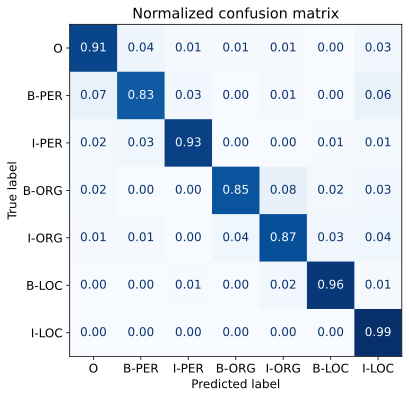

In [ ]:
plot_confusion_matrix(df_tokens["predicted_label"], df_tokens["labels"], tags.names)

In [ ]:
def get_samples(df):
    for _, row in df.iterrows(): # underscore _ indicates that index from iterator won't be used
        labels, preds, tokens, losses = [], [], [], []
        for i, mask in enumerate(row["attention_mask"]):
            if i not in {0, len(row["attention_mask"])}:
                labels.append(row["labels"][i])
                preds.append(row["predicted_label"][i])
                tokens.append(row["input_tokens"][i])
                losses.append(f"{row['loss'][i]:.2f}")
        df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels,
                               "preds": preds, "losses": losses}).T # transpose
        yield df_tmp

df["total_loss"] = df["loss"].apply(sum)
df_tmp = df.sort_values(by="total_loss", ascending=False).head(3) # grouped by rows with highest losses first i believe

for sample in get_samples(df_tmp):
    display(sample) # basically the function above places each row as a new temp dataframe. which since 3 rows are displayed. you can see 3 of them being displayed bellow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
tokens,▁',▁'',▁Τ,Κ,▁'',▁',▁',▁'',▁T,▁'',▁',ri,▁'',▁',k,▁'',▁',ala,</s>
labels,O,O,O,IGN,O,O,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,IGN
preds,O,O,B-ORG,I-ORG,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
losses,0.00,0.00,5.45,0.00,0.00,0.00,10.36,10.47,8.30,8.45,8.88,0.00,9.38,9.75,0.00,9.69,10.12,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
tokens,▁'',8,.,▁Juli,▁'',▁:,▁Protest,camp,▁auf,▁dem,▁Gelände,▁der,▁Republika,n,ischen,▁Gar,de,</s>
labels,B-ORG,IGN,IGN,I-ORG,I-ORG,I-ORG,I-ORG,IGN,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,IGN,IGN,I-ORG,IGN,IGN
preds,O,O,O,O,O,O,O,O,O,O,O,O,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,8.73,0.00,0.00,8.17,8.92,9.25,7.37,0.00,8.12,8.89,8.35,6.72,4.74,0.00,0.00,0.01,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,▁the,▁Central,▁African,▁Republic,</s>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,6.67,5.95,6.15,0.00,6.07,0.00,5.83,0.00,5.96,5.54,5.79,6.05,6.01,5.82,0.00


The Python code in your screenshot is involved in analyzing token-level losses from a model’s predictions, focusing on visualizing data samples with the highest losses. Let's walk through each part of the code to understand its purpose and function:

### Function: `get_samples`

This function is designed to extract and reformat data for visualization.

```python
def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []
        for i, mask in enumerate(row["attention_mask"]):
            if mask in {0, 1}:  # Assuming these are valid mask values
                labels.append(row["labels"][i])
                preds.append(row["predicted_label"][i])
                tokens.append(row["input_tokens"][i])
                losses.append(row["loss"][i])
        df_tmp = pd.DataFrame({
            "tokens": tokens,
            "labels": labels,
            "preds": preds,
            "losses": losses
        }).T
        yield df_tmp
```

- **Iterate over DataFrame Rows**: `for _, row in df.iterrows():` iterates through each row of the DataFrame.
- **Initialize Lists**: `labels, preds, tokens, losses = [], [], [], []` initializes lists to store data.
- **Filter Data Based on Attention Mask**: Inside the loop, data is filtered and collected based on the `attention_mask`. This mask typically indicates which tokens in the sequence should be considered by the model (e.g., `0` might mean ignored due to padding).
- **Create Temporary DataFrame**: Constructs a DataFrame from the filtered tokens, labels, predictions, and losses. It then transposes this DataFrame with `.T` to switch rows and columns, making it suitable for display.
- **Yield**: The function uses `yield` to return the DataFrame, making `get_samples` a generator function that produces DataFrames one at a time.

### Code to Aggregate and Display Samples

```python
df["total_loss"] = df["loss"].apply(sum)
df_tmp = df.sort_values(by="total_loss", ascending=False).head(3)

for sample in get_samples(df_tmp):
    display(sample)
```

- **Calculate Total Loss**: `df["total_loss"] = df["loss"].apply(sum)` adds a new column to the DataFrame calculating the sum of losses for each row (or each data sample).
- **Sort and Select Top Samples**: `df.sort_values(by="total_loss", ascending=False).head(3)` sorts the DataFrame by the `total_loss` in descending order and selects the top 3 entries.
- **Generate and Display Samples**: The loop iterates over the output of `get_samples(df_tmp)` and displays each sample. Since `get_samples` is a generator, it processes and yields one sample DataFrame at a time, which are displayed sequentially.

### Purpose of this Analysis

The purpose of this setup is to analyze and visualize the samples with the highest cumulative losses. This is particularly useful for:
- **Error Analysis**: Identifying which tokens or types of tokens are contributing most to the model's errors.
- **Model Improvement**: Insights gained from such analysis can guide improvements in the model training process, such as adjusting class weights, augmenting training data for troublesome cases, or tweaking the model architecture.

The displayed tables show tokens alongside their true labels, predicted labels, and individual losses, allowing for a detailed examination of where the model's predictions are going wrong and how significant the errors are.

The underscore `_` in the loop `for _, row in df.iterrows():` is a common convention in Python programming used to indicate that a variable is intentionally not used. In the context of iterating over DataFrame rows with `.iterrows()`, the method returns each row's index and the row data as a Series object.

### Breakdown of `.iterrows()`:

- **`.iterrows()`** method: This method on a pandas DataFrame generates an iterator that yields pairs of index and Series objects. Each Series object represents a row from the DataFrame.
  
  The syntax is:
  ```python
  for index, row in df.iterrows():
      # your code here
  ```

### Why Use `_`:

- **Index Unused**: In this specific loop, only the row data is needed, and the index of each row (which `iterrows()` also returns) is not used in the subsequent operations. Using `_` instead of a variable name like `index` is a way to indicate to others (or remind yourself) that this part of the returned data (index) is not required for the current operations, keeping the code cleaner and more focused.

### Iterating Over DataFrame Rows:

- The `for` loop iterates over each row of the DataFrame. Here’s what happens in each iteration:
  - The `row` variable represents the current row of the DataFrame as a Series object, where each item corresponds to a column value in that row.
  - Operations within the loop then use this `row` to access specific data like `row["attention_mask"]`, `row["labels"]`, etc., to perform necessary computations or transformations.

The pattern of using `_` is particularly useful when you are deconstructing a tuple (or other iterable) returned by a function or method and you only need a subset of the values it provides. In this case, `iterrows()` is necessary because it provides access to the row data, but the index is not needed for processing, hence it is assigned to `_` to indicate its irrelevance to the following code.

The `yield` keyword in Python is used within a function to make it a generator. A generator is a special type of iterator that generates values on the fly instead of returning them all at once. This allows you to handle large datasets or perform complex operations without consuming a lot of memory or processing power upfront. Generators are particularly useful when you need to process data incrementally or when the complete dataset is too large to fit into memory.

### Understanding `yield`

Here’s how `yield` works and what makes it distinct from a regular return statement:

1. **State Preservation**: When a function encounters a `yield` statement, it sends the value next to `yield` back to the caller but importantly, it remembers the exact point in the function where it left off (including all local variables and their states). The next time the generator is asked for a value, it resumes right after the `yield`.

2. **Iteration**: You can use a generator function in a loop or convert it into a list, treating it like an iterable. Each iteration calls the generator, which runs until it hits `yield`, then pauses, delivers the yield's value, and waits for the next iteration call.

3. **Resource Efficiency**: Since generators produce items only as required, they are more memory-efficient than using lists for large data sets.

### Example of a Generator

Here’s a simple example to illustrate how a generator works:

```python
def count_down(start):
    n = start
    while n > 0:
        yield n
        n -= 1

# Using the generator
for number in count_down(5):
    print(number)
```

This will output:
```
5
4
3
2
1
```

In this example, `count_down` is a generator function. It starts counting down from the number given to it. Each time it reaches the `yield` statement, it returns the current number to the caller but keeps its state waiting to continue from the next line after `yield` when the next item is requested.

### In Your Context

In the code snippet you showed, the function `get_samples` is designed to process and reformat data, yielding one sample DataFrame at a time. Here's the critical part using `yield`:

```python
yield df_tmp
```

Each call to `get_samples` processes one row from the DataFrame, transforms this data, and then yields a transformed part of it as a DataFrame (`df_tmp`). When used in a loop, it allows processing row by row without loading all the transformed data into memory at once, which can be very efficient when dealing with large datasets.

This method is powerful in contexts like data processing pipelines or streaming data where you process or respond to data as it arrives rather than waiting for the complete dataset to be available upfront.

In [ ]:
df_tmp = df.loc[df["input_tokens"].apply(lambda x: u"\u2581(" in x)].head(2) # the lambda function is applied to each element in "input_tokens" column of df
                                                                             # lambda function checks if unicode character "\u2581()" is present in token string
                                                                             # results in a Boolean Series where each value is 'True' if the token contains the specified character and false otherwise
                                                                             # Then, df.loc[...] will select only the rows where condition is 'True'
for sample in get_samples(df_tmp):
    display(sample)               # basically this code block is used to inspect/view rows in df which contains a specific token/sequence. Or a parantheses in this case.

,0,1,2,3,4,5
tokens,▁Ham,a,▁(,▁Unternehmen,▁),</s>
labels,B-ORG,IGN,I-ORG,I-ORG,I-ORG,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,0.02,0.00,0.03,0.02,0.02,0.00


,0,1,2,3,4,5,6,7
tokens,▁Kesk,kül,a,▁(,▁Mart,na,▁),</s>
labels,B-LOC,IGN,IGN,I-LOC,I-LOC,IGN,I-LOC,IGN
preds,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC
losses,0.05,0.00,0.00,0.03,0.04,0.00,0.03,0.00


## Cross-Lingual Transfer

In [ ]:
def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics["test_f1"]

In [ ]:
f1_scores = defaultdict(dict)
f1_scores["de"]["de"] = get_f1_score(trainer, panx_de_encoded["test"])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}") # '.' dot indicates start of precision specifier // 'f' means number is displayed as standard decimal number, as opposed to scientific notation

F1-score of [de] model on [de] dataset: 0.862


In [ ]:
text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [ ]:
def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds["test"])

In [ ]:
f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

F1-score of [de] model on [fr] dataset: 0.703


In [ ]:
f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

F1-score of [de] model on [it] dataset: 0.690


In [ ]:
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

F1-score of [de] model on [en] dataset: 0.582


The code in the screenshot you provided outlines a sequence of Python operations to evaluate a machine learning model's performance across different language datasets, using F1 scores as the metric. Let's walk through each code block, explaining what they do:

### Block 1: Function to Get F1 Score

```python
def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics["test_f1"]
```

- **Purpose**: This function is defined to compute the F1 score of a model on a given dataset.
- **Operations**:
  - `trainer.predict(dataset)`: This method of the `trainer` object uses the model to make predictions on the provided `dataset`.
  - `.metrics["test_f1"]`: After prediction, it accesses the `metrics` dictionary to retrieve the F1 score from the test set.

### Block 2: Evaluate and Print F1 Scores for Multiple Languages

```python
f1_scores = defaultdict(dict)
f1_scores["de"]["f1"] = get_f1_score(trainer, panx_de_encoded["test"])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:1.3f}")
```

- **Purpose**: Initializes a dictionary for storing F1 scores and computes the F1 score for the German (de) dataset.
- **Operations**:
  - `f1_scores` is a nested dictionary set up to store F1 scores by language.
  - `get_f1_score(trainer, panx_de_encoded["test"])`: Calculates the F1 score for the German test dataset.
  - `print(...)`: Prints the formatted F1 score.

### Block 3: Tag Text Example

```python
text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)
```

- **Purpose**: To tag a French text sample using the trained model.
- **Operations**:
  - `text_fr` holds a string in French.
  - `tag_text(...)`: A function (presumably defined elsewhere) that uses the model to predict tags for the text, tokenized by `xlmr_tokenizer`.

### Block 4: Generic Function for Language Performance Evaluation

```python
def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds["test"])
```

- **Purpose**: Defines a function to evaluate model performance for any given language dataset.
- **Operations**:
  - `encode_panx_dataset(...)`: Encodes the dataset for the specified language.
  - `get_f1_score(...)`: Computes the F1 score for the encoded dataset.

### Block 5: Applying the Evaluation Function

- **Purpose**: Uses the generic function to compute F1 scores for models trained on datasets in French, Italian, and English.
- **Operations**:
  - Each call `evaluate_lang_performance(...)` calculates the F1 score for the respective language's test dataset.
  - The results are printed, showing the model's performance across different language datasets.

### Summary

The script demonstrates a structured approach to evaluate and compare the performance of a machine learning model (likely a text or language processing model) across multiple languages. It leverages a generic function for computing F1 scores, simplifying the process of assessing model performance on different datasets. The use of tokenization and tagging in one of the blocks highlights practical application of the model to real text data.

### When does Zero-Shot Transfer Make Sense?

In [ ]:
def train_on_subset(dataset, num_samples):
    train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
    valid_ds = dataset["validation"]
    test_ds = dataset["test"]
    training_args.logging_steps = len(train_ds) // batch_size

    trainer = Trainer(model_init=model_init, args=training_args,
        data_collator=data_collator, compute_metrics=compute_metrics,
        train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)
    trainer.train()
    if training_args.push_to_hub:
        trainer.push_to_hub(commit_message="Training completed!")

    f1_score = get_f1_score(trainer, test_ds)
    return pd.DataFrame.from_dict(
        {"num_samples": [len(train_ds)], "f1_score": [f1_score]})

In [ ]:
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

In [ ]:
training_args.push_to_hub = False
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

Epoch,Training Loss,Validation Loss,F1
1,1.641600,1.303408,0.002449
2,1.229600,1.035404,0.195614
3,1.011300,0.934970,0.295517


,num_samples,f1_score
0,250,0.288689


In [ ]:
for num_samples in [500, 1000, 2000, 4000]:
  # train on 250, 500, 1000 ... subsets in order to compare between F1_score (performance) vs dataset size
  result_df = train_on_subset(panx_fr_encoded, num_samples)
  metrics_df = pd.concat([metrics_df, result_df], ignore_index=True)

Epoch,Training Loss,Validation Loss,F1
1,1.392400,0.921316,0.384604
2,0.776300,0.631391,0.598944
3,0.520800,0.544637,0.650625


Epoch,Training Loss,Validation Loss,F1
1,1.076500,0.540908,0.653668
2,0.463700,0.419723,0.729082
3,0.302600,0.377005,0.771878


Epoch,Training Loss,Validation Loss,F1
1,0.775200,0.425131,0.703053
2,0.317300,0.347449,0.777373
3,0.214400,0.325328,0.819265


Epoch,Training Loss,Validation Loss,F1
1,0.577200,0.361511,0.786891
2,0.278000,0.302272,0.816647
3,0.182200,0.278028,0.839585


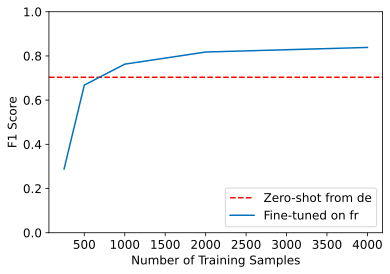

In [ ]:
fig, ax = plt.subplots()
ax.axhline(f1_scores["de"]["fr"], ls="--", color="r") # draws horizontal line, value of y=? based on f1_scores["de"]["fr"] // this is to compare the values of fine-tuning vs zero shot on French
metrics_df.set_index("num_samples").plot(ax=ax)
plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")
plt.ylim((0, 1)) # value limits for y-axis
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.show()

### Fine-Tuning on Multiple Languages at Once

In [ ]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
            [corpus[split] for corpus in corpora]).shuffle(seed=42)
    return multi_corpus

In [ ]:
panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

The code in the screenshot illustrates a process for fine-tuning a machine learning model on multilingual datasets using Hugging Face's `datasets` and `transformers` libraries. Let's go through the components step-by-step:

### 1. Concatenating Multilingual Datasets

```python
from datasets import concatenate_datasets

def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
            [corpus[split] for corpus in corpora]).shuffle(seed=42)
    return multi_corpus
```

- **Purpose**: This function concatenates datasets from different languages into a single `DatasetDict`, which is a dictionary-like container provided by the `datasets` library that holds multiple splits (e.g., training, validation, test) of datasets.
- **Implementation**:
  - `corpora`: The input parameter expected to be a list of datasets, each dataset representing a different language.
  - `for split in corpora[0].keys()`: Iterates over the dataset splits (commonly 'train', 'validation', 'test').
  - `concatenate_datasets([...])`: Concatenates the corresponding split from each dataset in the list, creating a larger split that contains data from all provided languages.
  - `.shuffle(seed=42)`: Shuffles the concatenated dataset to ensure that the order of data points does not bias the model training.
  
### 2. Example Usage of Concatenate Function

```python
panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])
```

- Concatenates German (`panx_de_encoded`) and French (`panx_fr_encoded`) datasets into a single dataset. This new dataset contains training, validation, and possibly test data from both languages mixed together.


In [ ]:
training_args.logging_steps = len(panx_de_fr_encoded["train"]) // batch_size
training_args.push_to_hub = True
training_args.output_dir = "xlm-roberta-base-finetuned-panx-de-fr"

trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=panx_de_fr_encoded["train"],
    eval_dataset=panx_de_fr_encoded["validation"])

trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

Epoch,Training Loss,Validation Loss,F1
1,0.282300,0.181053,0.820689
2,0.146500,0.165075,0.842783
3,0.094600,0.161188,0.861025


Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/shng2025/xlm-roberta-base-finetuned-panx-de-fr/commit/cbe807b0a38b56aa7966d573d7e23f8ef32b9ecd', commit_message='Training completed!', commit_description='', oid='cbe807b0a38b56aa7966d573d7e23f8ef32b9ecd', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"F1-score of [de-fr] model on [{lang}] dataset: {f1:.3f}")

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

F1-score of [de-fr] model on [de] dataset: 0.868


F1-score of [de-fr] model on [fr] dataset: 0.854


F1-score of [de-fr] model on [it] dataset: 0.798


F1-score of [de-fr] model on [en] dataset: 0.689


In [ ]:
# now trying to compare effect of fine-tuning on each language separately against multilingual learning on all the corpora
# first, this code block below is fine-tuning on each language separately
corpora = [panx_de_encoded]

# Exclude German from iteration
for lang in langs[1:]:
    training_args.output_dir = f"xlm-roberta-base-finetuned-panx-{lang}"
    # Fine-tune on monolingual corpus
    ds_encoded = encode_panx_dataset(panx_ch[lang])
    metrics = train_on_subset(ds_encoded, ds_encoded["train"].num_rows) # second parameter is how many samples to use. Which in this case full set is used, since .num_rows is inputted
    # Collect F1-scores in common dict
    f1_scores[lang][lang] = metrics["f1_score"][0] # records f1_score
    # Add monolingual corpus to list of corpora to concatenate
    corpora.append(ds_encoded) # concatenates, so will be used later on when training all at the same time!

Epoch,Training Loss,Validation Loss,F1
1,0.575400,0.333771,0.768317
2,0.262600,0.269599,0.819048
3,0.178800,0.284175,0.840638


Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,F1
1,0.693600,0.289601,0.753577
2,0.275100,0.256440,0.812525
3,0.172600,0.252298,0.828689


Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,F1
1,1.033500,0.489626,0.604324
2,0.488300,0.439653,0.646465
3,0.393600,0.401005,0.680733


tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

In [ ]:
corpora_encoded = concatenate_splits(corpora) # concatenate together the previously summed together list of datasets!

In [ ]:
# now training model which trains on all language at once
training_args.logging_steps = len(corpora_encoded["train"]) // batch_size
training_args.output_dir = "xlm-roberta-base-finetuned-panx-all"

trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=corpora_encoded["train"],
    eval_dataset=corpora_encoded["validation"])

trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

Epoch,Training Loss,Validation Loss,F1
1,0.295000,0.189755,0.818777
2,0.155600,0.171421,0.837182
3,0.102500,0.176699,0.850784


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/shng2025/xlm-roberta-base-finetuned-panx-all/commit/fd45bbabffc62868c1fce26b09fc98fc5c9ef10c', commit_message='Training completed!', commit_description='', oid='fd45bbabffc62868c1fce26b09fc98fc5c9ef10c', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
for idx, lang in enumerate(langs):
    f1_scores["all"][lang] = get_f1_score(trainer, corpora[idx]["test"])

In [ ]:
scores_data = {"de": f1_scores["de"],
               "each": {lang: f1_scores[lang][lang] for lang in langs},
               "all": f1_scores["all"]}
f1_scores_df = pd.DataFrame(scores_data).T.round(4)
f1_scores_df.rename_axis(index="Fine-tune on", columns="Evaluated on",
                         inplace=True)
f1_scores_df

Evaluated on,de,fr,it,en
Fine-tune on,,,,
de,0.8623,0.7033,0.6903,0.5816
each,0.8623,0.8389,0.8280,0.6955
all,0.8670,0.8560,0.8628,0.7685


- From this result, we can see that multilingual learning can provide signfiicant gains in performance. Especially in low resource language for cross-lingual transfer belong to simillar families.
- We can see in our experiments that German, French and Italian achieve simillar performance in 'all' category, perhaps suggesting these languages are more simillar to each other than to English.

- As general strategy, its good idea to focus attention on cross-lingual transfer within language families.